# Evaluation of Website Comparison Tool

### Imports

In [1]:
import Comparer
import Helper
import os
import json
import matplotlib.pyplot as plt 

In [2]:
_DIR = 'eval_results'

#### Websites

In [3]:
# different domains
sim0 = [
        'https://www.google.com',
        'https://cms.cispa.saarland',
        'https://www.uni-saarland.de/start.html',
        'https://github.com',
        'https://amazon.com',
        'https://twitter.com',
        'https://wikipedia.org'
       ]

# same domain
sim1 = [
        'https://cispa.de/de',
        'https://cms.cispa.saarland'
        ]

# same website
sim20 = [
         'https://cispa.de/de',
         'https://cispa.de/en'
        ]

sim21 = [
         'https://www.uni-saarland.de/start.html',
         'https://www.uni-saarland.de/forschung/profil.html'
        ]

#### Visualization

In [4]:
def combine(files):
    combined_stats = {}

    for file in files:
        with open(file, 'r') as json_file:
            data = json.load(json_file)
            if data['url1'] not in combined_stats:
                combined_stats[str(data['url1'])] = {}
                combined_stats[data['url1']][data['url2']] = data['stats']
            else:
                combined_stats[data['url1']][data['url2']] = data['stats']

    return combined_stats

In [5]:
def pretty_print(url1, stats):
    print(f'Domain: {url1}')
    print()
    print(f'URL\t\t\t\tContent\t\tDomain\t\tLinks\t\tImage Sources\t\tScreenshot')
    
    for url, stats in stats.items():
        out = f'{url}'
        for name, values in stats.items():
            for test, value in values.items():
                if test == 'sim_value':
                    value = round(value * 100, 2)
                    if name == 'Content':
                        out += f'{" " * (32 - len(url))}{value}'
                    elif name == 'Screenshots':
                        out += f'\t\t\t{value}'
                    else:
                        out += f'\t\t{value}'
                    break
        print(out)

# Usage:
# combined_stats = combine(files)
# for key, value in combined_stats.items():
#     pretty_print(key, value)
#     print('\n\n')

In [6]:
def plot(url1, stats):
    
    content = []
    domain = []
    links = []
    img = []
    screen = []
    
    for url, stats in stats.items():
        for name, values in stats.items():
            for test, value in values.items():
                if test == 'sim_value':
                    if name == 'Content':
                        content.append(value)
                    elif name == 'Domain':
                        domain.append(value)
                    elif name == 'Links':
                        links.append(value)
                    elif name == 'Image-Urls':
                        img.append(value)
                    elif name == 'Screenshots':
                        screen.append(value)
                        
    content = sum(content) / len(content)  * 100 if content else 0
    domain = sum(domain) / len(domain)  * 100 if domain else 0
    links = sum(links) / len(links)  * 100 if links else 0
    img = sum(img) / len(img)  * 100 if img else 0
    screen = sum(screen) / len(screen)  * 100 if screen else 0
    
    tests = ['Content', 'Domain', 'Links', 'Image Src', 'Screenshots']
    values = [content, domain, links, img, screen]
    plt.bar(tests, values)
    plt.title(f'Similarity Values for {url1}')
    plt.ylabel('Percentage')
    plt.show()

# Usage
# combined_stats = combine(files)
# for key, value in combined_stats.items():
#     plot(key, value)

#### Different Domains

In [7]:
folder = 'sim0'
files = []

In [8]:
comparer = Comparer.Comparer()

for url1 in sim0:
    log_dir = f'{_DIR}/{folder}/{Helper.get_domain(url1)}'
    os.system(f'mkdir {log_dir}')
        
    for url2 in sim0:
        if not url1 == url2:
            comparer.set_parameter(url1, url2)
            files.append(comparer.enable_logging(f'{log_dir}/'))
            comparer.compare_websites()

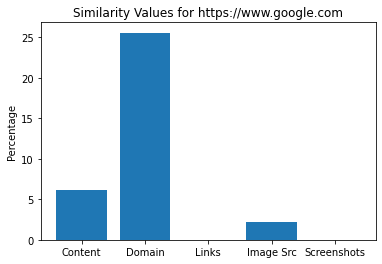

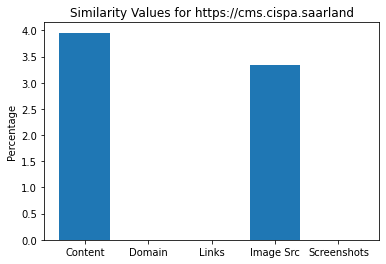

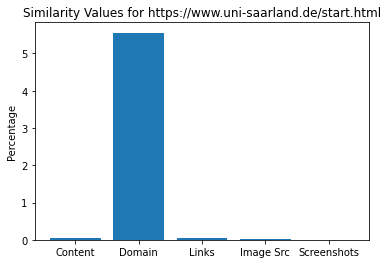

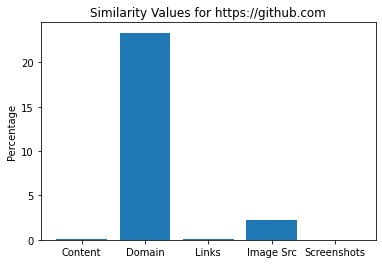

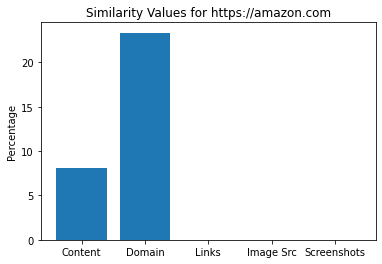

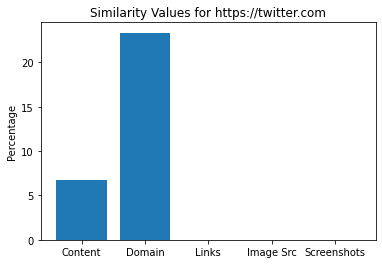

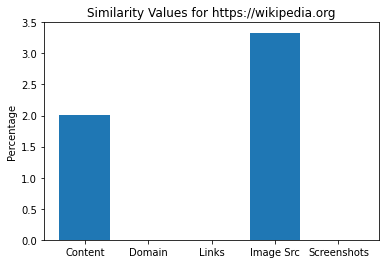

In [9]:
combined_stats = combine(files)
for key, value in combined_stats.items():
    plot(key, value)

#### Same Website

In [10]:
folder = 'sim20'
files = []

In [11]:
comparer = Comparer.Comparer()

for url1 in sim20:
    log_dir = f'{_DIR}/{folder}/{url1[8:].replace("/", "_")}'
    os.system(f'mkdir {log_dir}')
        
    for url2 in sim20:
        if not url1 == url2:
            comparer.set_parameter(url1, url2)
            files.append(comparer.enable_logging(f'{log_dir}/'))
            comparer.compare_websites()

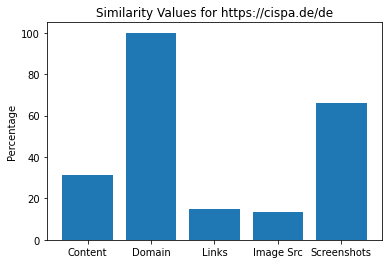

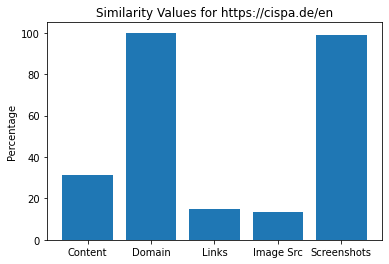

In [12]:
combined_stats = combine(files)
for key, value in combined_stats.items():
    plot(key, value)

In [13]:
folder = 'sim21'
files = []

In [14]:
comparer = Comparer.Comparer()

for url1 in sim21:
    log_dir = f'{_DIR}/{folder}/{url1[8:].replace("/", "_")}'
    os.system(f'mkdir {log_dir}')
        
    for url2 in sim21:
        if not url1 == url2:
            comparer.set_parameter(url1, url2)
            files.append(comparer.enable_logging(f'{log_dir}/'))
            comparer.compare_websites()

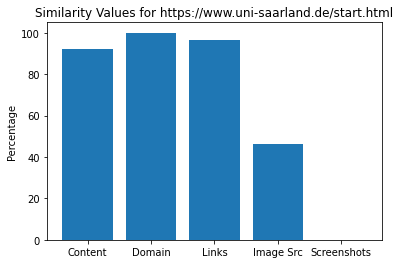

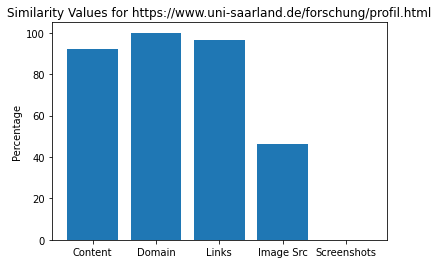

In [15]:
combined_stats = combine(files)
for key, value in combined_stats.items():
    plot(key, value)